## TP Integrador - Series de Tiempo

#### Alumno: Lucas Rivela
#### Cohorte: 5
#### Profesores: Magdalena Bouza y Carlos Romano

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', None)

##### Entrega 1

- Graficar una serie a partir de un dataset relevante. Describir observaciones.
- Descomponer una serie de tiempo usando el modelo aditivo de cuatro componentes. (statsmodel -> decompose en 4 partes: tendencia, cíclica, estacional y ruido)
- Extraer la tendencia y ajustar un modelo determinístico. Explicar su relación con el contexto. Obtener conclusiones acerca de la validez del modelo.
- Evaluar si la serie original es estacionaria. Aplicar transformaciones (preprocesamiento), graficar autocorrelación, autocorrelación parcial y extraer conclusiones.

In [5]:
df_sube21 = pd.read_csv('./dat-ab-usos-2021.csv')
df_sube21.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2021-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1466,NO
1,2021-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,625,NO
2,2021-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1119,NO
3,2021-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,2813,NO
4,2021-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,99,NO


In [4]:
df_sube22 = pd.read_csv('./dat-ab-usos-2022.csv')
df_sube22.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO


##### Me fijo si hay Nulls

In [6]:
df_sube21.isna().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2974
PROVINCIA          2974
MUNICIPIO          2974
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64

In [7]:
df_sube22.isna().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       1731
PROVINCIA          1731
MUNICIPIO          1731
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64

En ambos casos vemos nulls para las columnas Jurisdiccion, Provincia y Municipio. De todos modos serán ignoradas para el análisis de la serie.

In [8]:
df_sube21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410644 entries, 0 to 410643
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   410644 non-null  object
 1   NOMBRE_EMPRESA   410644 non-null  object
 2   LINEA            410644 non-null  object
 3   AMBA             410644 non-null  object
 4   TIPO_TRANSPORTE  410644 non-null  object
 5   JURISDICCION     407670 non-null  object
 6   PROVINCIA        407670 non-null  object
 7   MUNICIPIO        407670 non-null  object
 8   CANTIDAD         410644 non-null  int64 
 9   DATO_PRELIMINAR  410644 non-null  object
dtypes: int64(1), object(9)
memory usage: 31.3+ MB


In [9]:
df_sube22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291462 entries, 0 to 291461
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   291462 non-null  object
 1   NOMBRE_EMPRESA   291462 non-null  object
 2   LINEA            291462 non-null  object
 3   AMBA             291462 non-null  object
 4   TIPO_TRANSPORTE  291462 non-null  object
 5   JURISDICCION     289731 non-null  object
 6   PROVINCIA        289731 non-null  object
 7   MUNICIPIO        289731 non-null  object
 8   CANTIDAD         291462 non-null  int64 
 9   DATO_PRELIMINAR  291462 non-null  object
dtypes: int64(1), object(9)
memory usage: 22.2+ MB


In [10]:
df21 = df_sube21.drop(columns=['NOMBRE_EMPRESA', 'LINEA', 'AMBA', 'TIPO_TRANSPORTE', 'JURISDICCION', 'PROVINCIA', 'MUNICIPIO', 'DATO_PRELIMINAR'], axis=1)
df21.head()

,DIA_TRANSPORTE,CANTIDAD
0,2021-01-01,1466
1,2021-01-01,625
2,2021-01-01,1119
3,2021-01-01,2813
4,2021-01-01,99


In [11]:
df22 = df_sube22.drop(columns=['NOMBRE_EMPRESA', 'LINEA', 'AMBA', 'TIPO_TRANSPORTE', 'JURISDICCION', 'PROVINCIA', 'MUNICIPIO', 'DATO_PRELIMINAR'], axis=1)
df22.head()

,DIA_TRANSPORTE,CANTIDAD
0,2022-01-01,10
1,2022-01-01,19
2,2022-01-01,1418
3,2022-01-01,675
4,2022-01-01,1906


In [12]:
df21['DIA_TRANSPORTE'] = pd.to_datetime(df21['DIA_TRANSPORTE'])
df22['DIA_TRANSPORTE'] = pd.to_datetime(df22['DIA_TRANSPORTE'])

In [13]:
df = pd.concat([df21, df22], ignore_index=True)
df.head()

,DIA_TRANSPORTE,CANTIDAD
0,2021-01-01,1466
1,2021-01-01,625
2,2021-01-01,1119
3,2021-01-01,2813
4,2021-01-01,99


In [14]:
df.tail()

,DIA_TRANSPORTE,CANTIDAD
702101,2022-09-02,5
702102,2022-09-02,662
702103,2022-09-02,1303
702104,2022-09-02,393
702105,2022-09-02,730


In [48]:
serie = df.groupby(['DIA_TRANSPORTE']).sum()

In [49]:
serie.head()

,CANTIDAD
DIA_TRANSPORTE,
2021-01-01,1178259
2021-01-02,3626837
2021-01-03,2349540
2021-01-04,6352559
2021-01-05,6591339


In [50]:
serie.reset_index(inplace=True)

##### Trabajo con la Serie

In [51]:
serie['Year'] = pd.DatetimeIndex(serie['DIA_TRANSPORTE']).year
serie['Month'] = pd.DatetimeIndex(serie['DIA_TRANSPORTE']).month

serie.head()

,DIA_TRANSPORTE,CANTIDAD,Year,Month
0,2021-01-01,1178259,2021,1
1,2021-01-02,3626837,2021,1
2,2021-01-03,2349540,2021,1
3,2021-01-04,6352559,2021,1
4,2021-01-05,6591339,2021,1


In [52]:
serie.tail()

,DIA_TRANSPORTE,CANTIDAD,Year,Month
605,2022-08-29,12862451,2022,8
606,2022-08-30,13239561,2022,8
607,2022-08-31,13239636,2022,8
608,2022-09-01,12483866,2022,9
609,2022-09-02,6981899,2022,9


Text(0.5, 1.0, 'Viajes por dia')

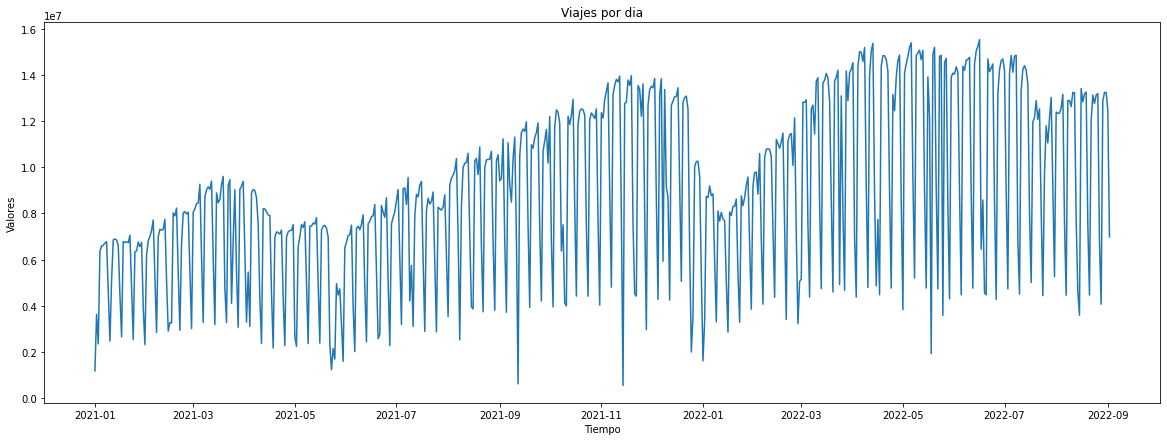

In [53]:
plt.figure(figsize=(20,7))
sns.lineplot(data=serie, x='DIA_TRANSPORTE', y='CANTIDAD')
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Viajes por dia')

En esta gráfica se pueden ver la cantidad de transacciones de SUBE por día desde Enero de 2021 hasta Septiembre de 2022.

Si tomamos la serie por cada año, parecería tener una tendencia creciente hacia el final de cada uno. Esto nos podría estar indicando que hay una especie de estacionalidad anual.

Por otro lado, también se pueden ver una especie de "serrucho" que son la cantidad de viajes cayendo en los fines de semana. Esto nos podría estar indicando una estacionalidad semanal.

In [54]:
por_mes = serie.groupby(['Year', 'Month']).sum()
por_mes.reset_index(inplace=True)
por_mes

,Year,Month,CANTIDAD
0,2021,1,167095783
1,2021,2,174180306
2,2021,3,233999339
3,2021,4,193512137
4,2021,5,163014875
5,2021,6,192962361
6,2021,7,228316341
7,2021,8,260555303
8,2021,9,279104810
9,2021,10,301885025


Text(0.5, 1.0, 'Comparacion viajes por mes 2021 vs 2022')

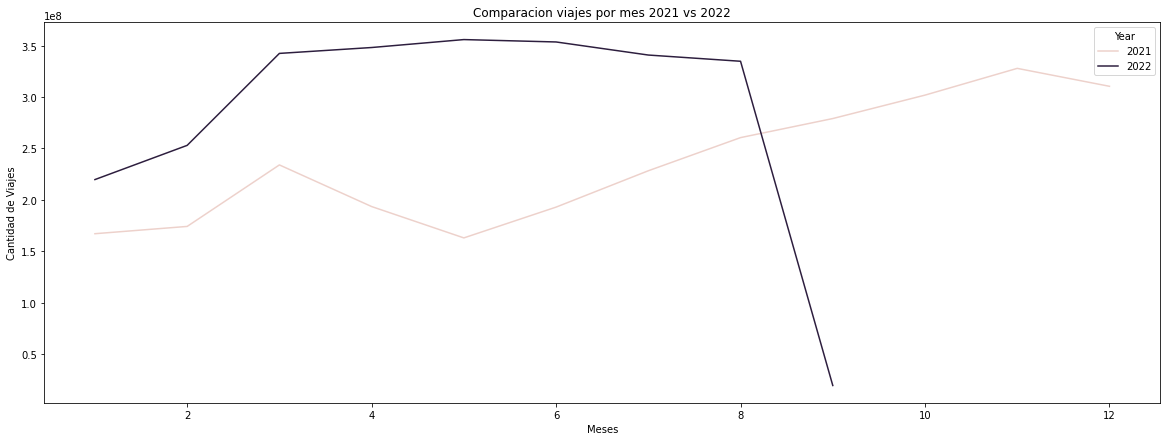

In [55]:
plt.figure(figsize=(20,7))
sns.lineplot(data=por_mes, x='Month', y='CANTIDAD', hue='Year')
plt.xlabel('Meses')
plt.ylabel('Cantidad de Viajes')
plt.title('Comparacion viajes por mes 2021 vs 2022')

En este gráfico podemos ver que en 2022 se hicieron más viajes en todos los meses. 2022 baja en septiembre porque el mes no estaba cerrado al momento de hacer los gráficos. Igualmente era lo esperable ya que 2021 todavía es un año muy pegado al 2020 de pandemia.

2022 parece tener mucha mayor estabilidad en la cantidad de viajes por mes comparado a 2021. Por otro lado en Mayo de 2021 se nota una caída en la cantidad de viajes por el rebrote de Covid que hubo.

También se puede ver que Enero y Febrero son los meses de menor cantidad de viajes (probablemente por las vacaciones).

In [56]:
serie["DayName"] = serie['DIA_TRANSPORTE'].dt.day_name()
serie["WeekDay"] = serie['DIA_TRANSPORTE'].dt.weekday

serie.head()

,DIA_TRANSPORTE,CANTIDAD,Year,Month,DayName,WeekDay
0,2021-01-01,1178259,2021,1,Friday,4
1,2021-01-02,3626837,2021,1,Saturday,5
2,2021-01-03,2349540,2021,1,Sunday,6
3,2021-01-04,6352559,2021,1,Monday,0
4,2021-01-05,6591339,2021,1,Tuesday,1


In [57]:
por_dayofweek = serie.groupby(['Year', 'Month', 'WeekDay', 'DayName']).sum()
por_dayofweek.reset_index(inplace=True)
por_dayofweek.sort_values(['Year', 'Month', 'WeekDay'], ascending=[True, True, True])
por_dayofweek

,Year,Month,WeekDay,DayName,CANTIDAD
0,2021,1,0,Monday,24550817
1,2021,1,1,Tuesday,26568103
2,2021,1,2,Wednesday,27040631
3,2021,1,3,Thursday,26857365
4,2021,1,4,Friday,28369544
...,...,...,...,...,...
137,2022,8,4,Friday,52836199
138,2022,8,5,Saturday,29700767
139,2022,8,6,Sunday,17595340
140,2022,9,3,Thursday,12483866


Text(0.5, 1.0, 'Comparacion viajes por dia de la semana 2021 vs 2022')

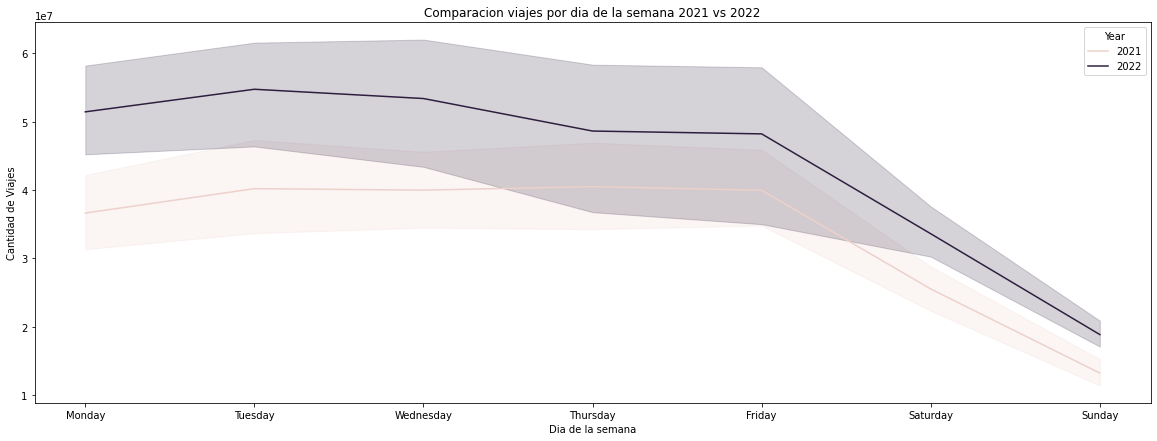

In [60]:
plt.figure(figsize=(20,7))
sns.lineplot(data=por_dayofweek, x='DayName', y='CANTIDAD', hue='Year')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de Viajes')
plt.title('Comparacion viajes por dia de la semana 2021 vs 2022')

En este otro gráfico vemos agrupados los viajes por día de la semana. Se puede ver como la cantidad de viajes cae hacia el final de la semana y se reduce mucho los fines de semana. Como en el gráfico anterior, 2022 le gana en todos los días a 2021.

<AxesSubplot:xlabel='CANTIDAD', ylabel='Count'>

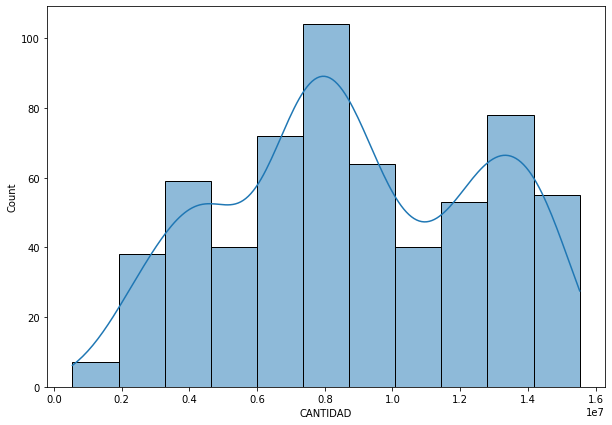

In [65]:
plt.figure(figsize=(10,7))
sns.histplot(data=serie, x='CANTIDAD', kde=True)

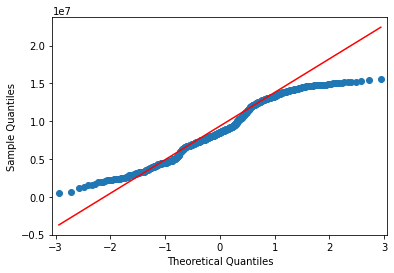

In [75]:
sm.qqplot(serie['CANTIDAD'], line='q')
plt.show()

Con el QQ Plot se puede decir que la distribución parecería ser uniforme (consultar).

<AxesSubplot:xlabel='CANTIDAD'>

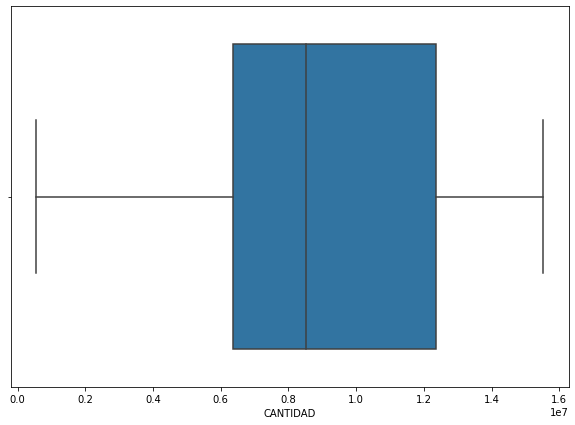

In [71]:
plt.figure(figsize=(10,7))
sns.boxplot(data=serie, x='CANTIDAD')

##### Descompocisión usando el modelo aditivo de 4 componentes

##### Extracción de Tendencia

##### Preprocesamiento